# Hypothesis testing

# 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Load and Explore the Dataset

In [2]:
# Load Titanic dataset
titanic_df = pd.read_csv('train.csv')

# Display first few rows and info about the dataset
titanic_df.head()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3.Clean the Dataset

In [3]:
# Drop rows with missing 'Age' values for simplicity
titanic_df = titanic_df.dropna(subset=['Age'])

# Drop rows where 'Pclass' is not 1 or 3
titanic_df = titanic_df[titanic_df['Pclass'].isin([1, 3])]

# Keep relevant columns
titanic_df = titanic_df[['Pclass', 'Age']]

# 4.Visualize the Data 

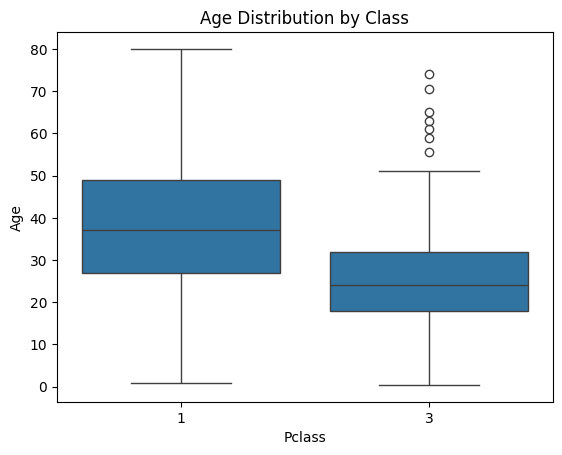

In [4]:
# Plot age distributions by class
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age Distribution by Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 5.Conduct the Two-Sample T-Test

In [5]:
# Separate age data by class
age_class1 = titanic_df[titanic_df['Pclass'] == 1]['Age']
age_class3 = titanic_df[titanic_df['Pclass'] == 3]['Age']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(age_class1, age_class3)

t_stat, p_value

(10.849122601201033, 6.134470007830625e-25)

# 6.Interpret the Results

In [6]:
# Interpret results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in age between first class and third class passengers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in age between first class and third class passengers.")

Reject the null hypothesis: There is a significant difference in age between first class and third class passengers.


In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  541 non-null    int64  
 1   Age     541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.7 KB
